# Mushroom Edibility Classification

### Developed by Prakhar Tayal


The aim of this project is to use analysis and make a model which could predict whether a given mushroom is edible or poisonous based on it's appearance,shape and other similar features.


Description of the dataset and the attributes is added at the bottom

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
mushrooms = pd.read_csv('mushrooms.csv')

In [3]:
mushrooms.shape

(8124, 23)

I want to check that there is no imbalance in the target variable.Incase there are more observations for a certain outcome it could skew the model into predicting one outcome more than the other.

In [ ]:
plt.title('Total Observations')
sns.histplot(data = mushrooms['class'])
plt.show()

There is no significant imbalance between the two observations for the Target variable. So we can proceed as usual without having to adress this 

Since this data only contains Categorical features, I had to encode the features.

In [4]:
dummy_df = pd.get_dummies(mushrooms, columns = mushrooms.columns, drop_first='True')


Verifying that labels are created appropriately.

In [ ]:
dummy_df.head()

In [ ]:
dummy_df.shape

However after label encoding, I observe that there are too many features in the dataset and mostly not all of them are going to be helpful to the model. So here I am trying to find out how is the target variable correlated to the rest of the features.

In [5]:
corr= dummy_df.corr()

In [6]:
corr.iloc[0]

class_p        1.000000
cap-shape_c    0.023007
cap-shape_f    0.018526
cap-shape_k    0.163565
cap-shape_s   -0.060664
                 ...   
habitat_l      0.155150
habitat_m     -0.138627
habitat_p      0.323346
habitat_u      0.112078
habitat_w     -0.150087
Name: class_p, Length: 96, dtype: float64

In [7]:
corr = corr['class_p'].abs().sort_values(ascending=False)

In [8]:
corr

class_p                       1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
                                ...   
cap-shape_c                   0.023007
cap-surface_g                 0.023007
cap-shape_f                   0.018526
stalk-root_b                  0.017712
stalk-surface-above-ring_y    0.016198
Name: class_p, Length: 96, dtype: float64

Now i want to pick only the features that have a correlation factor greater than 0.20 

In [9]:
numb_cor = corr[corr>.20]

In [10]:
len(numb_cor)

35

In [11]:
top_34_features = corr[1:35].index  # Skipping the first one (target itself)

Subsetting the dataset with only the relevant features I have chosen previously

In [12]:
df_with_most_corr = dummy_df[top_34_features]

In [13]:
df_with_most_corr.head()

,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,bruises_t,stalk-surface-above-ring_s,spore-print-color_h,ring-type_l,...,stalk-color-above-ring_p,stalk-color-below-ring_p,odor_l,population_n,stalk-root_c,stalk-color-above-ring_w,stalk-color-below-ring_w,ring-number_t,stalk-color-below-ring_n,stalk-root_e
0,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,1,1,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
3,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [14]:
x = df_with_most_corr
y = dummy_df['class_p']

Splitting the Data in Train Test Split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#Skip the next few code chunks if you don't wanna train the model yourself

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)
#skip till here             

In [21]:
#loading my pretrained model

lr = joblib.load('mushroom_weights.pkl')

In [22]:
lr.score(x_test,y_test)

0.9926153846153846

In [23]:
y_pred = lr.predict(x_test)

In [16]:
#Loading preloaded weights(Uploaded as mushrooms_weights.pkl)

My Model has achieved an accuracy of 99.26 %, But since our aim is to classify whether or not a kind of mushroom is safe to consume or not, we need to test how many False Positives does our model give.
For that I will plot a Confusion Matrix 

In [24]:
cm = confusion_matrix(y_test,y_pred)

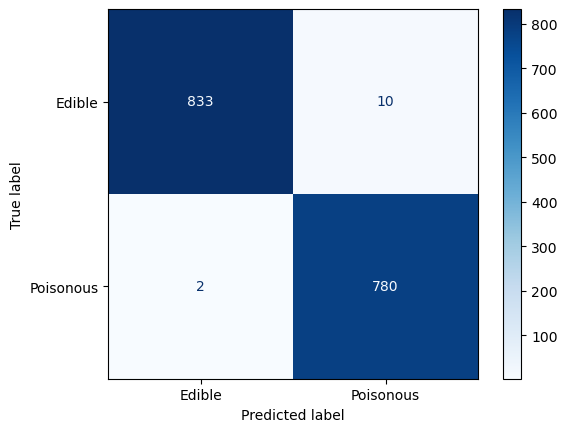

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap=plt.cm.Blues)


From the table we can claim that if the model predicted that a certain mushroom is edible, there is 0.002 % chance of that mushroom being poisonous.